# Youtube Analysis

written as personal portofolio

Crafted by: Ghazian Hanafi


## Function & Package

set youtube API > Set working directory path & package
* set youtube API
* set tools & package
* set working directory path and package

In [3]:
!pip install --upgrade google-api-python-client
!pip install --upgrade google-auth google-auth-oauthlib google-auth-httplib2
import argparse
import os
import google.oauth2.credentials
import google_auth_oauthlib.flow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google_auth_oauthlib.flow import InstalledAppFlow
from google.colab import drive
import numpy as np
import pandas as pd
from googleapiclient.discovery import build
#For offline use you can use this script with delete comment symbol (#)
#import os
#path=os.getcwd()+"/"
#input=path+"input/"
#output=path+"output/"
#------------------------------------#
#For Google Collab use this
path='/content/drive/My Drive/00_Portofolio/'
input='/content/drive/My Drive/00_Portofolio/input/'
output='/content/drive/My Drive/00_Portofolio/output/'

api_key="xxxxxxxxx"
drive.mount('/content/drive/')
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

from googleapiclient.discovery import build
from datetime import timedelta

def get_video_details(youtube, video_id):
    request = youtube.videos().list(
        part='snippet,statistics,contentDetails',
        id=video_id
    )
    response = request.execute()
    return response['items'][0]
def get_channel_details(youtube, channel_id):
    request = youtube.channels().list(
        part='statistics',
        id=channel_id
    )
    response = request.execute()
    return response['items'][0]['statistics']

def parse_duration(duration):
    # Convert YouTube duration format to a more readable format
    duration = duration.replace('PT', '')
    hours = 0
    minutes = 0
    seconds = 0

    if 'H' in duration:
        hours, duration = duration.split('H')
        hours = int(hours)*60*60
    if 'M' in duration:
        minutes, duration = duration.split('M')
        minutes = int(minutes)*60
    if 'S' in duration:
        seconds = int(duration.replace('S', ''))

    return int(hours+minutes+seconds)

def youtube_search(query, max_results=5, order='relevance'):
    search_request = youtube.search().list(
        q=query,
        part='snippet',
        type='video',
        maxResults=max_results,
        order=order
    )

    search_response = search_request.execute()

    results = []
    for item in search_response['items']:
        video_id = item['id']['videoId']
        video_details = get_video_details(youtube, video_id)
        video_stats = video_details['statistics']
        video_content_details = video_details['contentDetails']

        channel_id = video_details['snippet']['channelId']
        channel_stats = get_channel_details(youtube, channel_id)

        video_data = {
            'title': item['snippet']['title'],
            'description': item['snippet']['description'],
            'channel_title': item['snippet']['channelTitle'],
            'publish_time': item['snippet']['publishedAt'],
            'video_id': video_id,
            'url': f"https://www.youtube.com/watch?v={video_id}",
            'like_count': int(video_stats.get('likeCount', 0)),
            'dislike_count': int(video_stats.get('dislikeCount', 0)),
            'view_count': int(video_stats.get('viewCount', 0)),
            'comment_count': int(video_stats.get('commentCount', 0)),
            'duration (Second)': parse_duration(video_content_details['duration']),
            'subscriber_count': int(channel_stats.get('subscriberCount', 0))
        }
        results.append(video_data)

    # Sort results by view count in descending order
    results.sort(key=lambda x: x['view_count'], reverse=True)

    return results


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##Data Preparation


open data > data cleaning



* open data
* data cleaning

In [4]:
filterorder=['relevance','viewCount','rating']
cari=['Climate Crisis','Climate Change','Global Warming','Environmental Crisis']
#cari=['environmental crisis','economic crisis','social crisis']
for x in filterorder:
  order_by=f'{x}'  # Options: 'date', 'rating', 'relevance', 'title', 'videoCount', 'viewCount'
  jumlahcari=30
  appended_data = []
  for i in cari:
    coba=youtube_search(i, max_results=jumlahcari,order=order_by)
    df_youtubesearch=pd.DataFrame(coba)
    df_youtubesearch["Search_type"]=[f"{i}"]*jumlahcari
    appended_data.append(df_youtubesearch)
  # see pd.concat documentation for more info
  appended_data = pd.concat(appended_data)
  appended_data.replace([np.inf, -np.inf], 0, inplace=True)
  appended_data["like/view"]=appended_data["like_count"]/appended_data["view_count"]
  appended_data["comment/view"]=appended_data["comment_count"]/appended_data["view_count"]
  appended_data["Engagement"]=(appended_data["comment_count"])/appended_data["subscriber_count"]
  appended_data.to_csv(input+f"climatology_youtubesearch_{x}.csv")
appended_data




#.mean()
#df_youtubesearch['duration']=pd.to_datetime(df_youtubesearch['duration'],)# format='%H:%M:%S',  utc = True).dt.time

,title,description,channel_title,publish_time,video_id,url,like_count,dislike_count,view_count,comment_count,duration (Second),subscriber_count,Search_type,like/view,comment/view,Engagement
0,Memo to COP27 from the Maldives. Subject: Clim...,When a young marine biologist on the frontline...,Nekton,2022-11-03T00:00:13Z,UrCClI2Hb8Y,https://www.youtube.com/watch?v=UrCClI2Hb8Y,8,0,302871,2,35,5380,Climate Crisis,0.000026,0.000007,0.000007
1,Three ways the climate crisis is already being...,The climate is in crisis and it affects us all...,Greenpeace Nordic,2014-10-25T16:52:11Z,V3cNrJ_mo9g,https://www.youtube.com/watch?v=V3cNrJ_mo9g,63,0,9232,9,222,184,Climate Crisis,0.006824,0.000975,0.000975
2,How can marketing help solve our climate crisi...,How do you harness the dark arts of marketing ...,TEDx Talks,2020-11-20T17:16:52Z,dwZWb7Mzsy0,https://www.youtube.com/watch?v=dwZWb7Mzsy0,182,0,7669,12,703,40900000,Climate Crisis,0.023732,0.001565,0.001565
3,How can education really contribute to solving...,Debating the Futures of Education” is a video ...,UNESCO,2020-10-06T17:26:07Z,TrTL1__4SvM,https://www.youtube.com/watch?v=TrTL1__4SvM,68,0,4400,0,120,462000,Climate Crisis,0.015455,0.000000,0.000000
4,"Reading 8, Communicating the Climate Crisis",,Climate Crisis 101,2022-02-18T06:14:27Z,qHreDaBAgKQ,https://www.youtube.com/watch?v=qHreDaBAgKQ,7,0,2890,1404,1821,887,Climate Crisis,0.002422,0.485813,0.485813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,सुख रही है धरती जल रहें हैं पेड़। Environmental...,enviromentalcrisis #globalwarming #deforestati...,Ram Kumar Niraj,2024-06-16T05:30:07Z,pDWTtA_SEpQ,https://www.youtube.com/watch?v=pDWTtA_SEpQ,23,0,128,4,1187,2000,Environmental Crisis,0.179688,0.031250,0.031250
26,Ecological Crisis: Heavy rains in Latin Americ...,"Heavy rains and flooding affects Ecuador, Chil...",TeleSUR English,2024-06-18T02:11:11Z,ndMGcTTlScc,https://www.youtube.com/watch?v=ndMGcTTlScc,5,0,126,0,250,216000,Environmental Crisis,0.039683,0.000000,0.000000
27,Canadian Forest in Flames || A Devastating Eco...,Canadian Forest in Flames: A Devastating Ecolo...,YARZBASE,2023-07-27T10:00:48Z,wdsweOzfjos,https://www.youtube.com/watch?v=wdsweOzfjos,4,0,16,2,31,109,Environmental Crisis,0.250000,0.125000,0.125000
28,Ep 8 - The Climate Crisis: Truth or Nonsense?!,"In this episode, Michael tackles the heated de...",The Coleman Nation,2024-06-14T22:00:38Z,xIVGKG5NUZI,https://www.youtube.com/watch?v=xIVGKG5NUZI,5,0,9,1,2734,303,Environmental Crisis,0.555556,0.111111,0.111111


##Data Analysis
General Statistical Description > Visualization

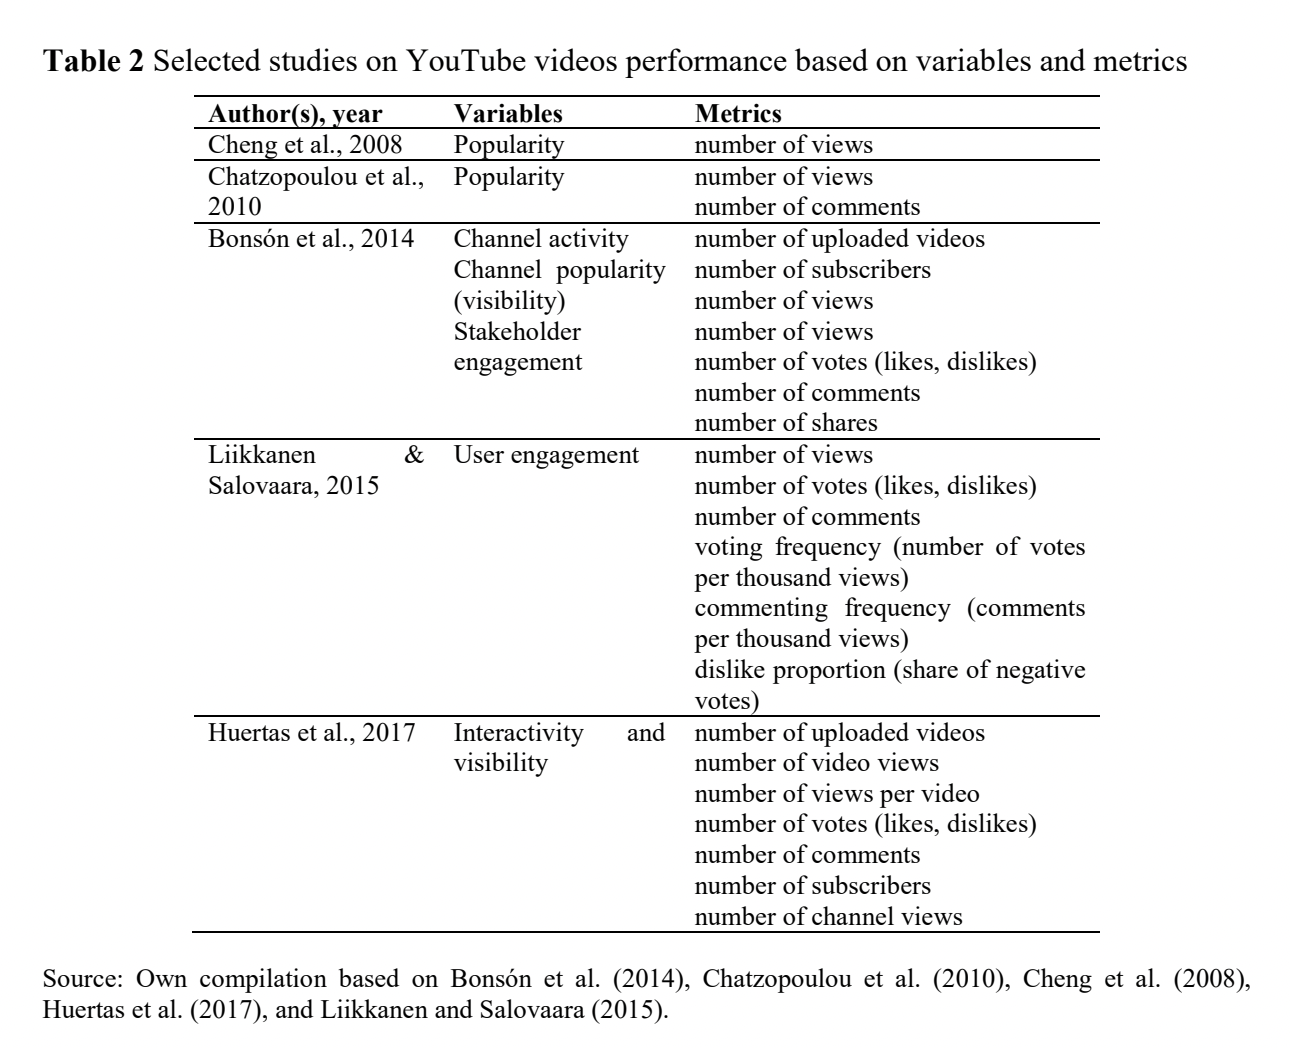

CORONEL, M. DESTINATION PROMOTIONAL VIDEOS ON YOUTUBE: ASSESSING AUDIENCE ENGAGEMENT. THE CENTRAL EUROPEAN JOURNAL OF REGIONAL DEVELOPMENT AND TOURISM, 47.

### Order by Relevance
order by relevance are youtube default setting for search filter so this is gonna be the number one priority to be analyzed, due to that condition the analysis begin with general statistical description, then visualization.

* General Statistical Description
** Popularity
**


In [ ]:
datayoutubebyRelevance=pd.read_csv(input+f"climatology_youtubesearch_relevance.csv")
column_countable=['like_count', 'view_count', 'comment_count','like/view', 'comment/view', 'duration (Second)','subscriber_count']
for i in column_countable:
  print(f"\n{i}")
  print(datayoutubebyRelevance.groupby(by="Search_type").describe(include=np.number)[f"{i}"])
#appended_data.columns
datayoutubebyRelevance


like_count
                      count           mean            std   min      25%  \
Search_type                                                                
Climate Change         30.0   74507.033333  170796.125441  66.0  4507.75   
Climate Crisis         30.0   10280.400000   18935.076893   8.0   437.25   
Environmental Crisis   30.0  122522.033333  555289.237812   1.0    99.50   
Global Warming         30.0   24503.100000   30864.508644   0.0  2273.50   

                          50%       75%        max  
Search_type                                         
Climate Change        18953.5  33035.00   710834.0  
Climate Crisis         2222.5   6469.75    73368.0  
Environmental Crisis   1262.5  13410.25  3050773.0  
Global Warming        11373.5  30856.50   113885.0  

view_count
                      count          mean           std     min        25%  \
Search_type                                                                  
Climate Change         30.0  1.946720e+06  3.

,Unnamed: 0,title,description,channel_title,publish_time,video_id,url,like_count,view_count,comment_count,duration (Second),subscriber_count,Search_type,like/view,comment/view
0,0,See what three degrees of global warming looks...,If global temperatures rise three degrees Cels...,The Economist,2021-10-30T11:00:25Z,uynhvHZUOOo,https://www.youtube.com/watch?v=uynhvHZUOOo,65686,4008499,14035,984,3340000,Climate Crisis,0.016387,0.003501
1,1,Is green hydrogen the answer to the climate cr...,Green hydrogen produces zero emissions and man...,DW Documentary,2021-11-02T17:00:07Z,4sn0ecqZgog,https://www.youtube.com/watch?v=4sn0ecqZgog,17770,3390210,2086,1706,5620000,Climate Crisis,0.005242,0.000615
2,2,Scientist Explains How Climate Crisis Would Be...,Is climate change reversible? Dr. Douglas Harr...,The Onion,2023-11-15T18:40:00Z,bkrcxLgHn-w,https://www.youtube.com/watch?v=bkrcxLgHn-w,73368,1423164,5954,109,2600000,Climate Crisis,0.051553,0.004184
3,3,Greta Thunberg and George Monbiot make short f...,Environmental activists Greta Thunberg and Geo...,Guardian News,2019-09-19T10:00:52Z,-Q0xUXo2zEY,https://www.youtube.com/watch?v=-Q0xUXo2zEY,32895,1240415,2582,221,3590000,Climate Crisis,0.026519,0.002082
4,4,The Biggest Myth About Climate Change,Check out America Outdoors Understory on @PBS ...,Be Smart,2022-09-15T18:18:12Z,E6bVBH9y5O8,https://www.youtube.com/watch?v=E6bVBH9y5O8,31697,897968,19662,1738,5160000,Climate Crisis,0.035299,0.021896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,25,The Environmental Crisis - Subtitled,"All over the world, concerned people are takin...",Glad Tidings,2022-01-12T15:01:28Z,WWlSRaFdeg0,https://www.youtube.com/watch?v=WWlSRaFdeg0,2,481,0,47,199,Environmental Crisis,0.004158,0.000000
116,26,Introduction: Environmental Crisis Response,Introduction: Environmental Crisis Response wi...,BAKER BOTTS,2020-01-29T23:05:03Z,R5RkyGV3-ZM,https://www.youtube.com/watch?v=R5RkyGV3-ZM,1,427,0,140,496,Environmental Crisis,0.002342,0.000000
117,27,How we&#39;re fighting the environmental crisis,"Subscribe for solutions to climate change, def...",CDP,2023-01-31T19:00:09Z,RhG791ZJivo,https://www.youtube.com/watch?v=RhG791ZJivo,11,326,0,18,3180,Environmental Crisis,0.033742,0.000000
118,28,Tavis Smiley on climate justice campaign,Radio host and author Tavis Smiley discusses t...,FOX 11 Los Angeles,2024-06-15T01:54:36Z,VZKBU1bk7i8,https://www.youtube.com/watch?v=VZKBU1bk7i8,4,230,5,367,977000,Environmental Crisis,0.017391,0.021739


* Visualization

<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning 

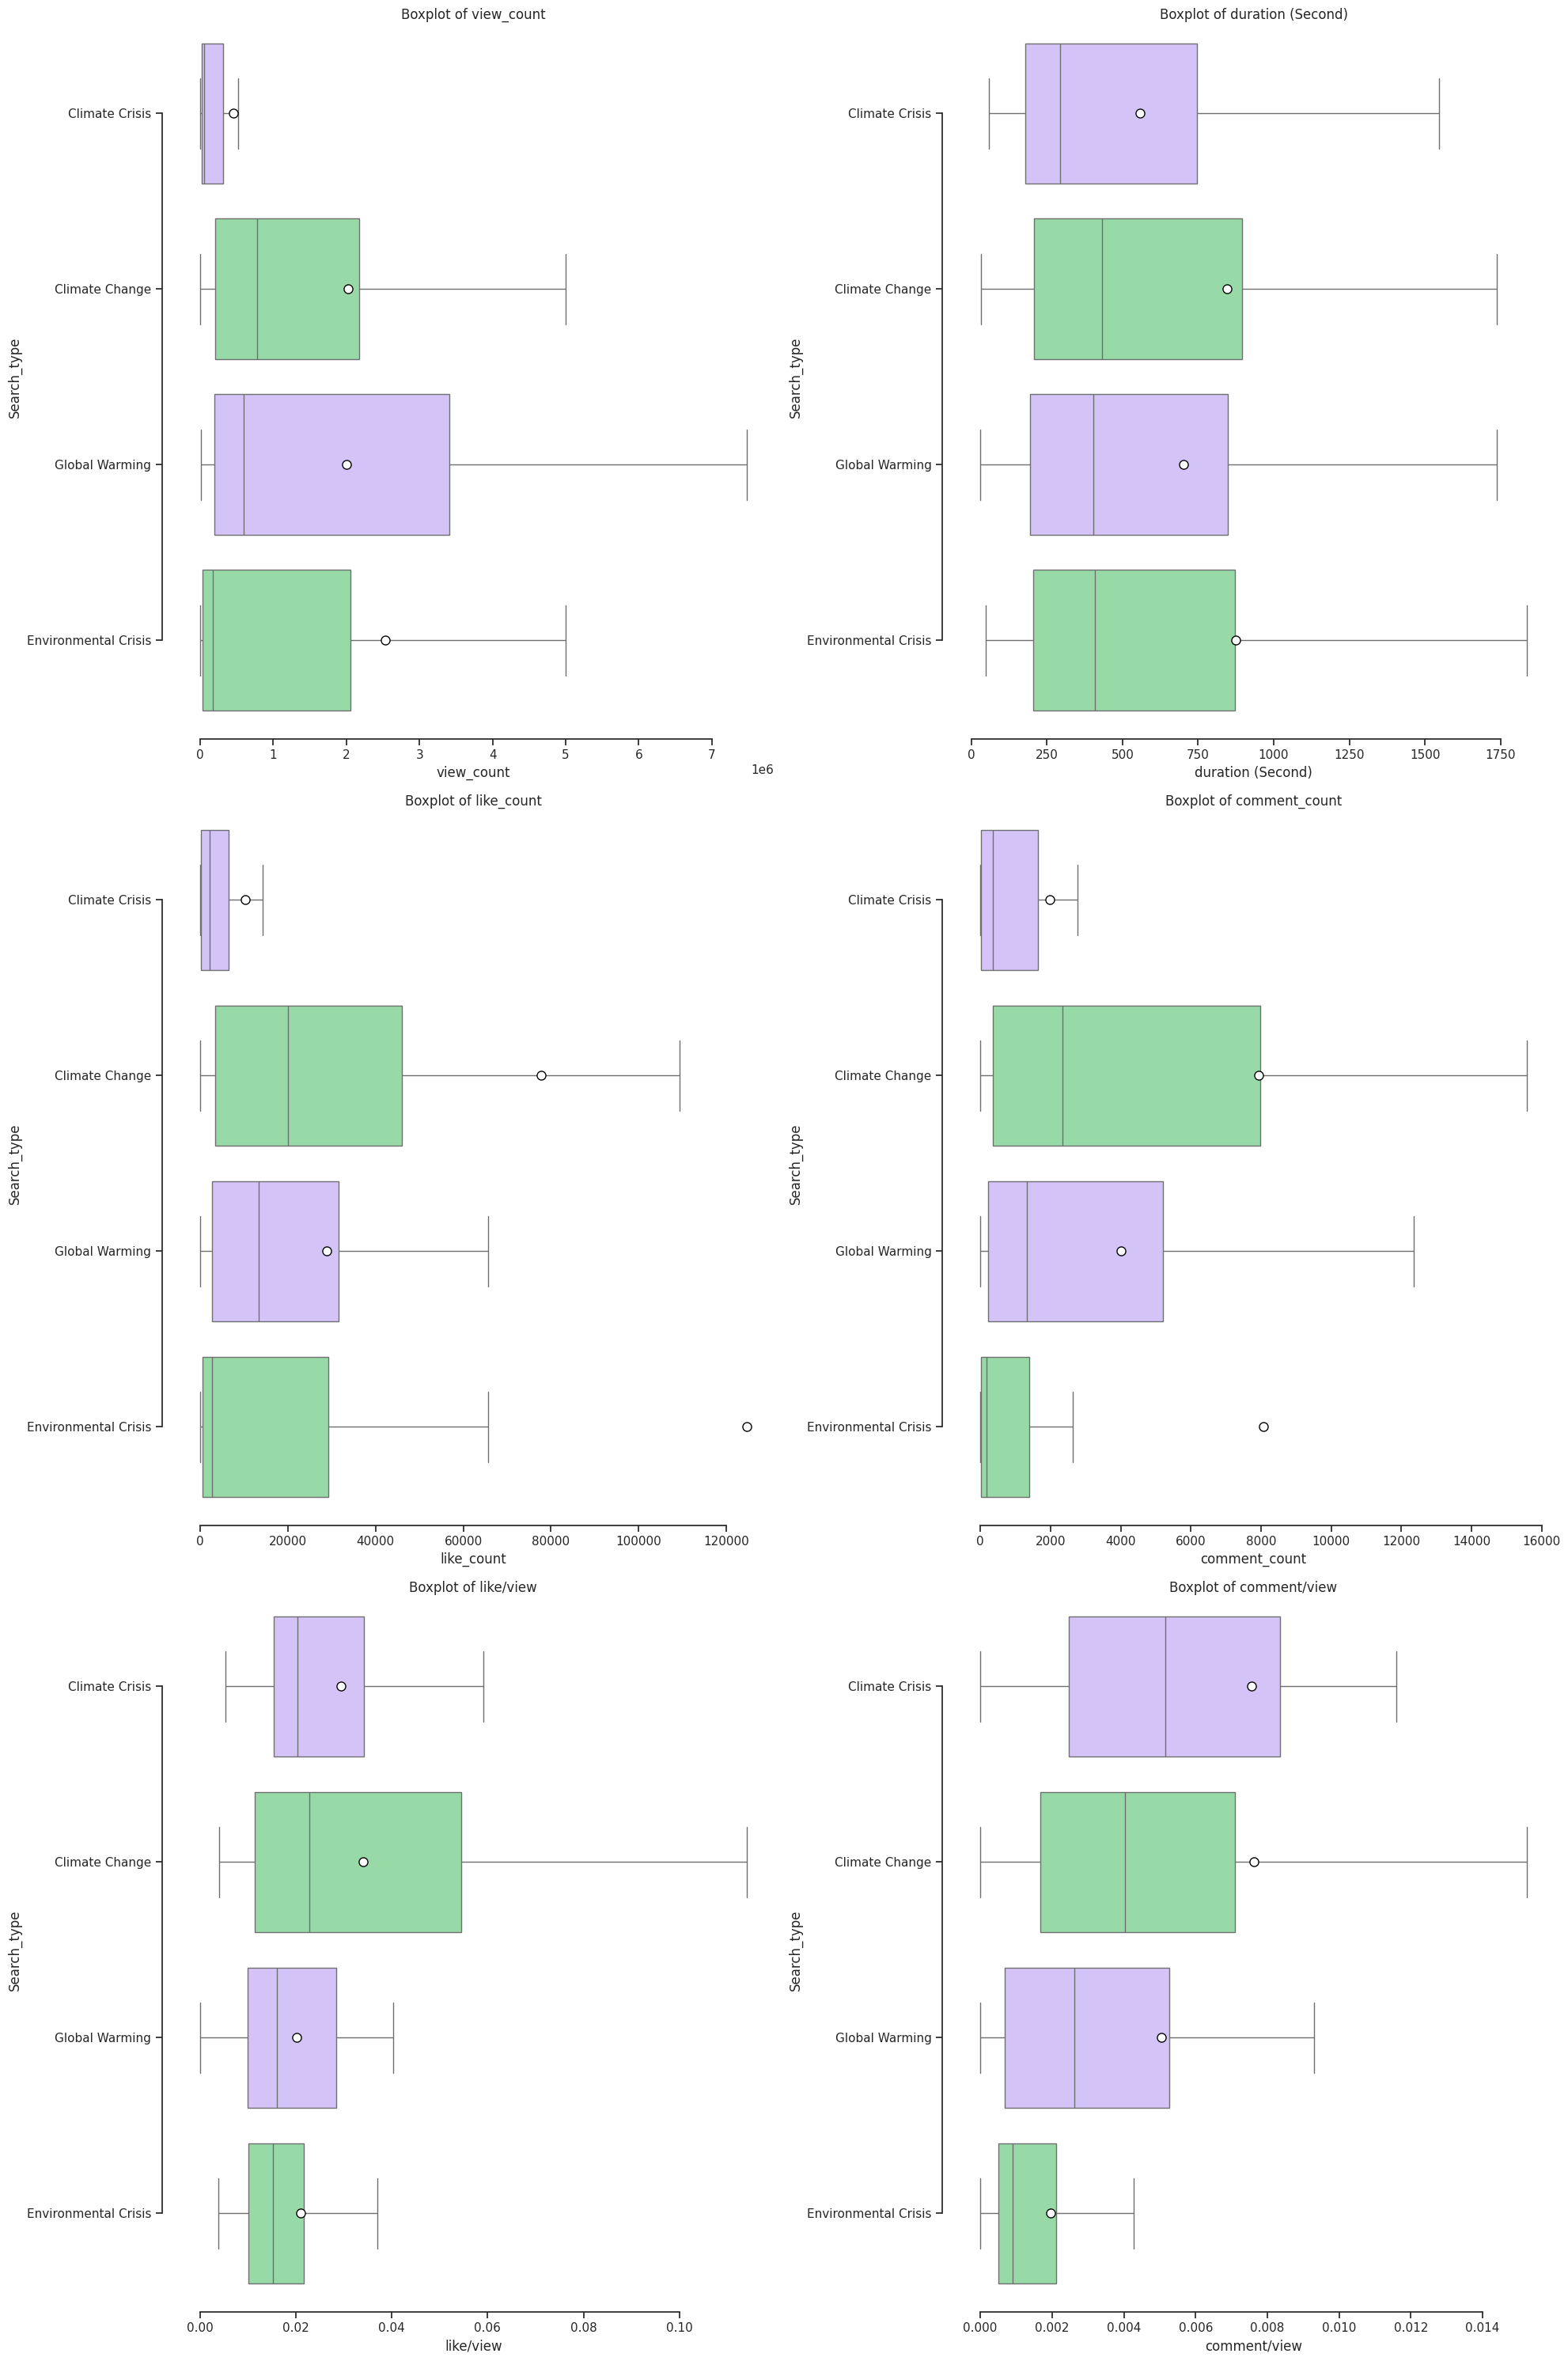

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables=['view_count','duration (Second)','like_count',  'comment_count','like/view', 'comment/view']
fig, axes = plt.subplots(ncols=2, nrows=int(len(variables)/2),figsize=(20, 30))
sns.set_theme(style="ticks", palette="pastel")
# Plot each variable in a separate subplot
for ax, var in zip(axes.flat, variables):
    sns.boxplot(y="Search_type", x=var,
                palette=["m", "g"], showfliers=False,showmeans=True,
                meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'8'},
                data=datayoutubebyRelevance, ax=ax)
    ax.set_title(f'Boxplot of {var}')

# Remove the top and right spines
sns.despine(offset=10,trim=True)

plt.tight_layout()
plt.show()

* Overall Analysis

In [ ]:
sumdat=appended_data.groupby(by="Search_type").max()
sumdat


,title,description,channel_title,publish_time,video_id,url,like_count,view_count,comment_count,duration (Second),view/like,view/comment
Search_type,,,,,,,,,,,,
Climate Change,Wind and climate change | DW Documentary,"You've seen it in the news, heard it on the ra...",WIRED,2024-06-15T02:15:00Z,yiw6_JakZFc,https://www.youtube.com/watch?v=yiw6_JakZFc,710836,13391656,63098,5157,254.214571,2090.610837
Climate Crisis,“STOP having babies – it’s a climate crisis.”,While people in northern latitudes may ring in...,leena norms,2024-06-15T02:15:00Z,uynhvHZUOOo,https://www.youtube.com/watch?v=uynhvHZUOOo,78094,4005183,19661,2090,190.800259,3324.285714
Environmental Crisis,What is Climate Change? | Start Here,While nations have placed significant attentio...,callmeexpensiveprofit,2024-06-14T19:05:45Z,xtf1eHBlh14,https://www.youtube.com/watch?v=xtf1eHBlh14,3049800,34943960,194007,5157,257.813277,16165.252747
Global Warming,Why humans are so bad at thinking about climat...,What could our future world look like if we co...,WIRED,2024-06-11T20:36:09Z,wCIeAqusDuk,https://www.youtube.com/watch?v=wCIeAqusDuk,130932,8733372,19661,2758,228.219568,9514.254237


### Order by ViewCount
* General Statistical Description

In [ ]:
datayoutubebyViewcount=pd.read_csv(input+"climatology_youtubesearch_viewCount.csv")

column_countable=['like_count', 'view_count', 'comment_count','like/view', 'comment/view', 'duration (Second)']
for i in column_countable:
  print(f"\n{i}")
  print(datayoutubebyViewcount.groupby(by="Search_type").describe(include=np.number)[f"{i}"])
#appended_data.columns


like_count
                      count           mean            std   min      25%  \
Search_type                                                                
Climate Change         30.0   76851.166667  170801.678209  48.0  3022.50   
Climate Crisis         30.0   13380.400000   22721.631277  23.0   696.50   
Environmental Crisis   30.0  114999.866667  555149.304743   2.0   234.25   
Global Warming         30.0   28874.233333   36083.321641   0.0  2758.25   

                          50%       75%        max  
Search_type                                         
Climate Change        17037.0  45997.75   710836.0  
Climate Crisis         2411.5  14999.00    78094.0  
Environmental Crisis   1459.0  13393.75  3049800.0  
Global Warming        13411.5  31498.00   130932.0  

view_count
                      count          mean           std      min        25%  \
Search_type                                                                   
Climate Change         30.0  1.983598e+06  

* Visualization

<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning 

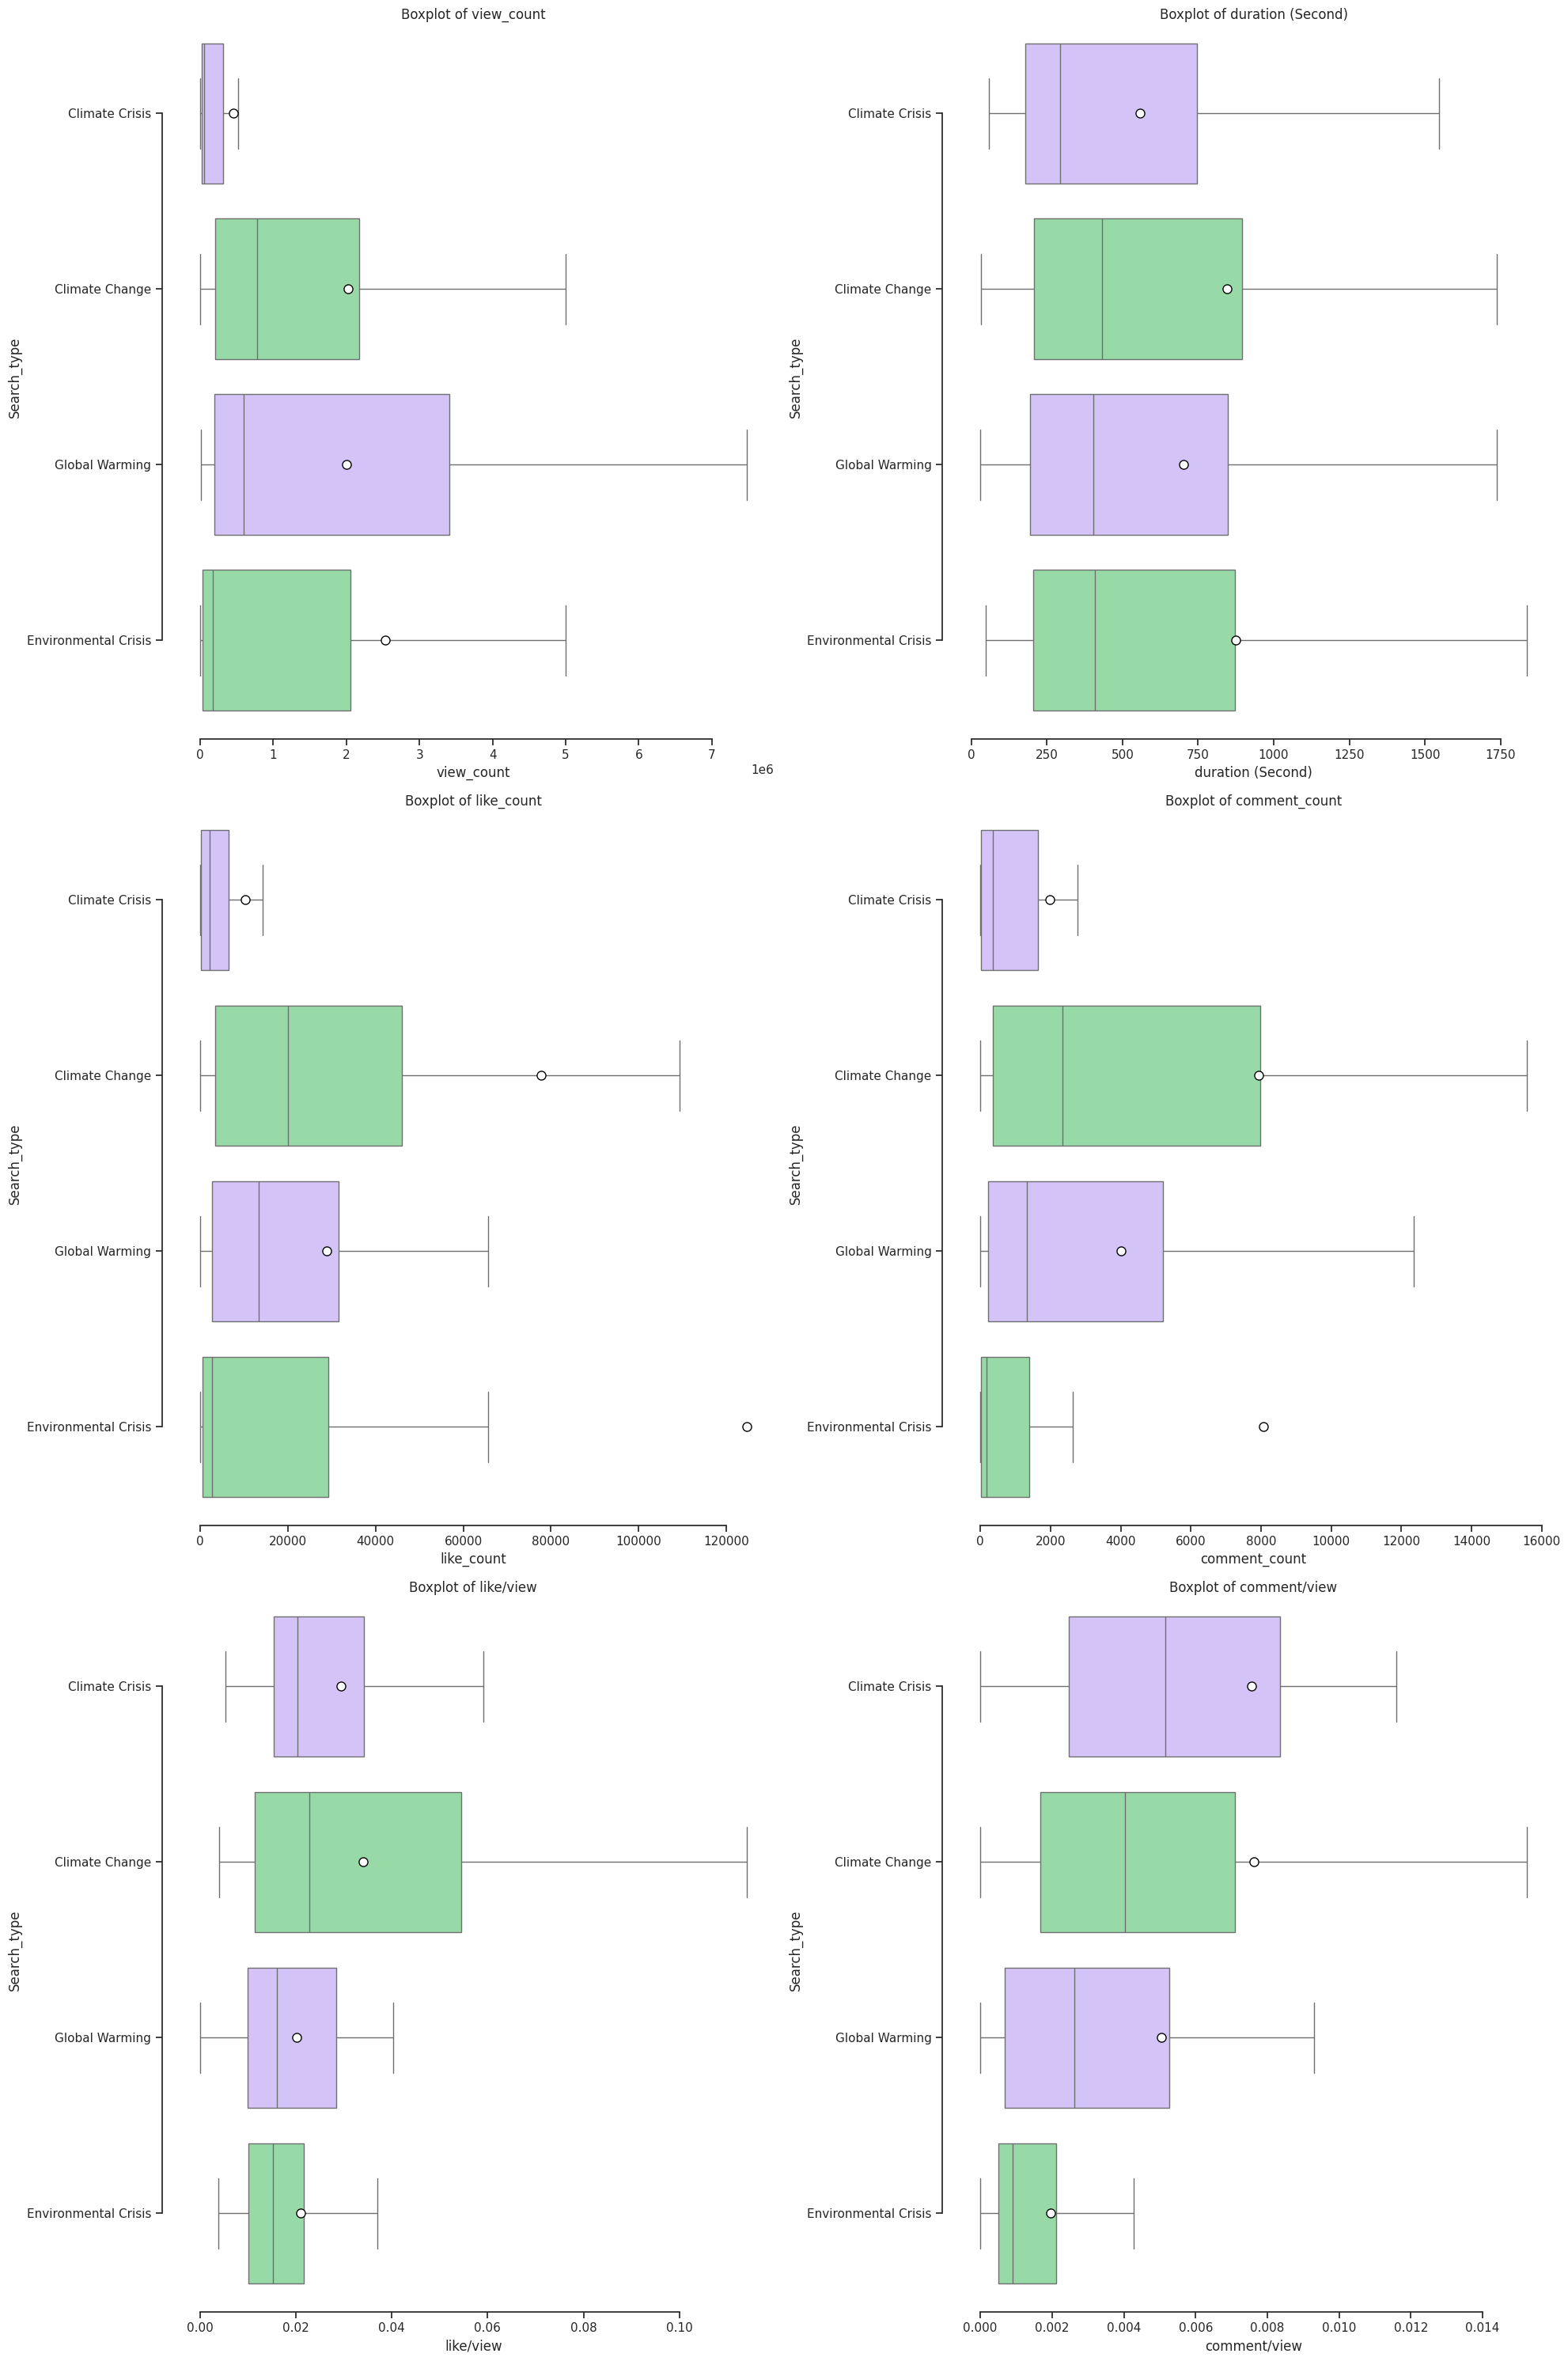

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables=['view_count','duration (Second)','like_count',  'comment_count','like/view', 'comment/view']
fig, axes = plt.subplots(ncols=2, nrows=int(len(variables)/2),figsize=(20, 30))
sns.set_theme(style="ticks", palette="pastel")
# Plot each variable in a separate subplot
for ax, var in zip(axes.flat, variables):
    sns.boxplot(y="Search_type", x=var,
                palette=["m", "g"], showfliers=False,showmeans=True,
                meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'8'},
                data=datayoutubebyViewcount, ax=ax)
    ax.set_title(f'Boxplot of {var}')

# Remove the top and right spines
sns.despine(offset=10,trim=True)

plt.tight_layout()
plt.show()

* Overall Analysis

In [ ]:
sumdat=datayoutubebyViewcount.groupby(by="Search_type").max()
sumdat


,title,description,channel_title,publish_time,video_id,url,like_count,view_count,comment_count,duration (Second),view/like,view/comment
Search_type,,,,,,,,,,,,
Climate Change,Wind and climate change | DW Documentary,"You've seen it in the news, heard it on the ra...",WIRED,2024-06-15T02:15:00Z,yiw6_JakZFc,https://www.youtube.com/watch?v=yiw6_JakZFc,710836,13391656,63098,5157,254.214571,2090.610837
Climate Crisis,“STOP having babies – it’s a climate crisis.”,While people in northern latitudes may ring in...,leena norms,2024-06-15T02:15:00Z,uynhvHZUOOo,https://www.youtube.com/watch?v=uynhvHZUOOo,78094,4005183,19661,2090,190.800259,3324.285714
Environmental Crisis,What is Climate Change? | Start Here,While nations have placed significant attentio...,callmeexpensiveprofit,2024-06-14T19:05:45Z,xtf1eHBlh14,https://www.youtube.com/watch?v=xtf1eHBlh14,3049800,34943960,194007,5157,257.813277,16165.252747
Global Warming,Why humans are so bad at thinking about climat...,What could our future world look like if we co...,WIRED,2024-06-11T20:36:09Z,wCIeAqusDuk,https://www.youtube.com/watch?v=wCIeAqusDuk,130932,8733372,19661,2758,228.219568,9514.254237


### Order by Rating
* General Statistical Description

In [ ]:
datayoutubebyRating=pd.read_csv(input+f"climatology_youtubesearch_rating.csv")
column_countable=['like_count', 'view_count', 'comment_count','like/view', 'comment/view', 'duration (Second)']
for i in column_countable:
  print(f"\n{i}")
  print(datayoutubebyRating.groupby(by="Search_type").describe(include=np.number)[f"{i}"])
#appended_data.columns


like_count
                      count           mean            std   min      25%  \
Search_type                                                                
Climate Change         30.0   76851.166667  170801.678209  48.0  3022.50   
Climate Crisis         30.0   13380.400000   22721.631277  23.0   696.50   
Environmental Crisis   30.0  114999.866667  555149.304743   2.0   234.25   
Global Warming         30.0   28874.233333   36083.321641   0.0  2758.25   

                          50%       75%        max  
Search_type                                         
Climate Change        17037.0  45997.75   710836.0  
Climate Crisis         2411.5  14999.00    78094.0  
Environmental Crisis   1459.0  13393.75  3049800.0  
Global Warming        13411.5  31498.00   130932.0  

view_count
                      count          mean           std      min        25%  \
Search_type                                                                   
Climate Change         30.0  1.983598e+06  

* Visualization

<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(y="Search_type", x=var,
<ipython-input-55-15154b2214fa>:9: FutureWarning: 

Passing `palette` without assigning 

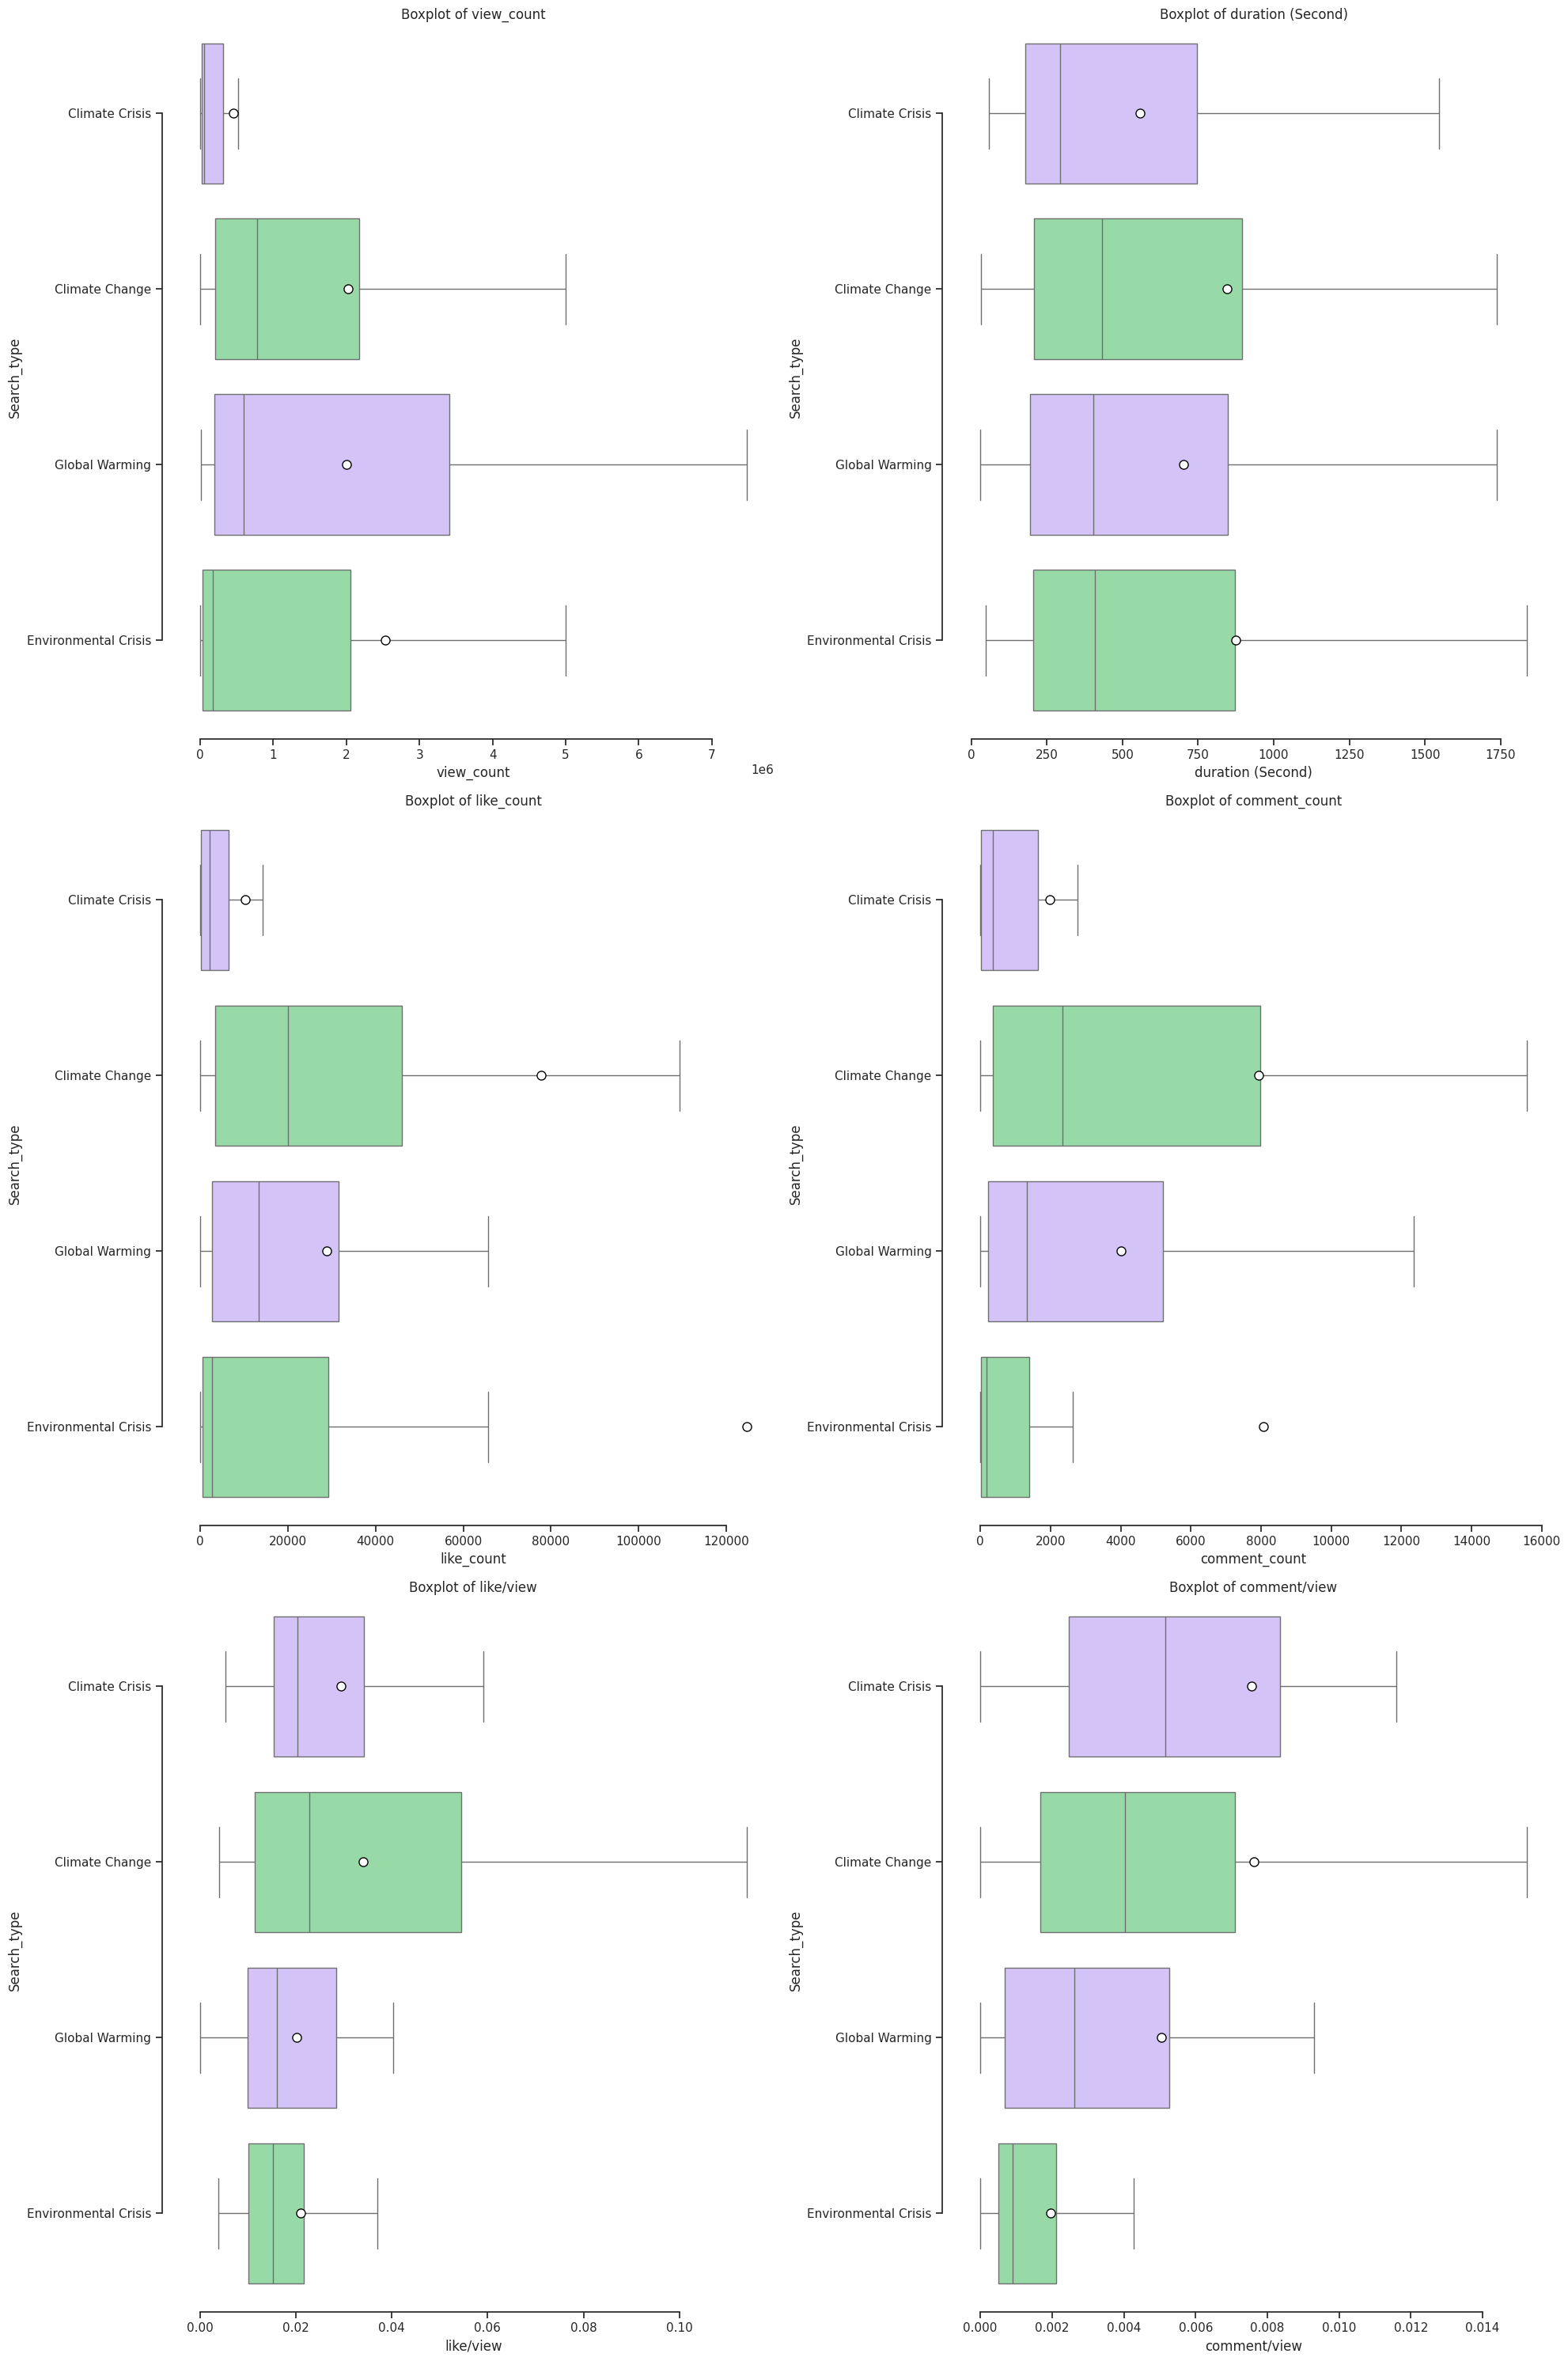

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables=['view_count','duration (Second)','like_count',  'comment_count','like/view', 'comment/view']
fig, axes = plt.subplots(ncols=2, nrows=int(len(variables)/2),figsize=(20, 30))
sns.set_theme(style="ticks", palette="pastel")
# Plot each variable in a separate subplot
for ax, var in zip(axes.flat, variables):
    sns.boxplot(y="Search_type", x=var,
                palette=["m", "g"], showfliers=False,showmeans=True,
                meanprops={'marker':'o',
                       'markerfacecolor':'white',
                       'markeredgecolor':'black',
                       'markersize':'8'},
                data=datayoutubebyRating, ax=ax)
    ax.set_title(f'Boxplot of {var}')

# Remove the top and right spines
sns.despine(offset=10,trim=True)

plt.tight_layout()
plt.show()

* Overall Analysis

In [ ]:
sumdat=datayoutubebyRating.groupby(by="Search_type").max()
sumdat


,title,description,channel_title,publish_time,video_id,url,like_count,view_count,comment_count,duration (Second),view/like,view/comment
Search_type,,,,,,,,,,,,
Climate Change,Wind and climate change | DW Documentary,"You've seen it in the news, heard it on the ra...",WIRED,2024-06-15T02:15:00Z,yiw6_JakZFc,https://www.youtube.com/watch?v=yiw6_JakZFc,710836,13391656,63098,5157,254.214571,2090.610837
Climate Crisis,“STOP having babies – it’s a climate crisis.”,While people in northern latitudes may ring in...,leena norms,2024-06-15T02:15:00Z,uynhvHZUOOo,https://www.youtube.com/watch?v=uynhvHZUOOo,78094,4005183,19661,2090,190.800259,3324.285714
Environmental Crisis,What is Climate Change? | Start Here,While nations have placed significant attentio...,callmeexpensiveprofit,2024-06-14T19:05:45Z,xtf1eHBlh14,https://www.youtube.com/watch?v=xtf1eHBlh14,3049800,34943960,194007,5157,257.813277,16165.252747
Global Warming,Why humans are so bad at thinking about climat...,What could our future world look like if we co...,WIRED,2024-06-11T20:36:09Z,wCIeAqusDuk,https://www.youtube.com/watch?v=wCIeAqusDuk,130932,8733372,19661,2758,228.219568,9514.254237
